In [16]:
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

%matplotlib inline

In [17]:
data = pandas.read_csv('google-trends-data-science-5y.csv', sep=',')

data.head(12)

,Week,Trends Count
0,2014-09-21,16
1,2014-09-28,15
2,2014-10-05,16
3,2014-10-12,16
4,2014-10-19,15
5,2014-10-26,16
6,2014-11-02,16
7,2014-11-09,16
8,2014-11-16,18
9,2014-11-23,15


In [18]:
data.tail(12)

,Week,Trends Count
249,2019-06-30,74
250,2019-07-07,77
251,2019-07-14,81
252,2019-07-21,78
253,2019-07-28,77
254,2019-08-04,78
255,2019-08-11,79
256,2019-08-18,91
257,2019-08-25,88
258,2019-09-01,87


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


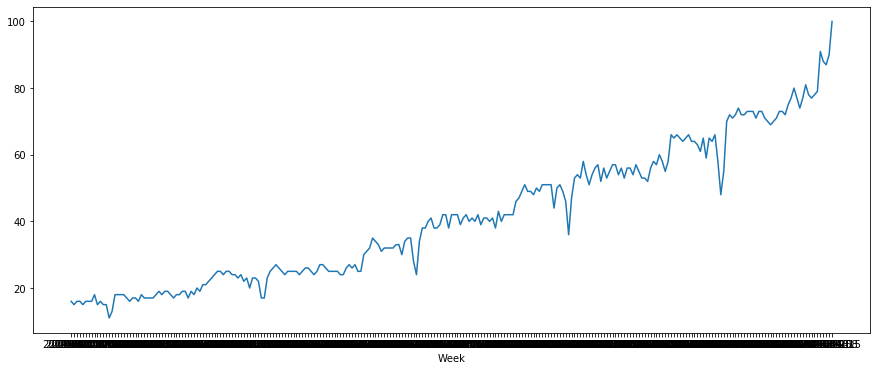

In [20]:
series = data.groupby('Week')['Trends Count'].sum()
series_full = series

plt.figure(figsize=(15, 6))
sns.lineplot(x=series.index, y=series.values)

# last 5 years

In [21]:
time_span = 52

In [22]:
from sklearn.preprocessing import MinMaxScaler

values = series.values
values = values.reshape((len(values), 1))

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)

normalized = scaler.transform(values)

In [23]:
data_frame = pandas.DataFrame()

data_frame['ds'] = series.index
data_frame['y'] = normalized

In [24]:
prophet = Prophet().fit(data_frame)

future = prophet.make_future_dataframe(periods=time_span, freq='W')

future.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
308,2020-08-16
309,2020-08-23
310,2020-08-30
311,2020-09-06
312,2020-09-13


In [25]:
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
308,2020-08-16,1.042445,1.008351,1.078395
309,2020-08-23,1.072415,1.038072,1.108830
310,2020-08-30,1.097690,1.062772,1.135026
311,2020-09-06,1.112670,1.075236,1.149184
312,2020-09-13,1.116623,1.079761,1.152514


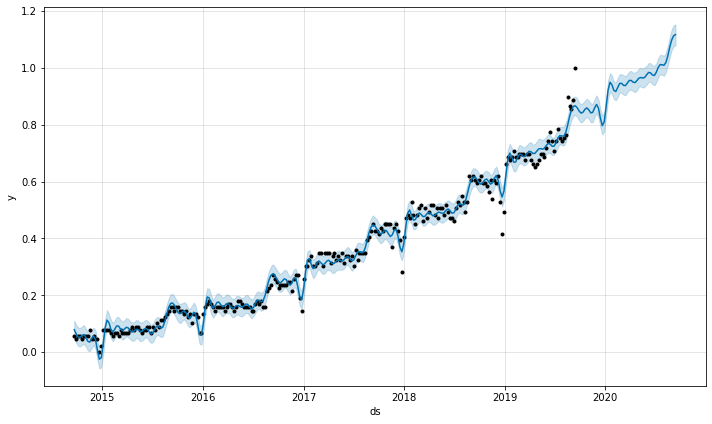

In [26]:
fig1 = prophet.plot(forecast)

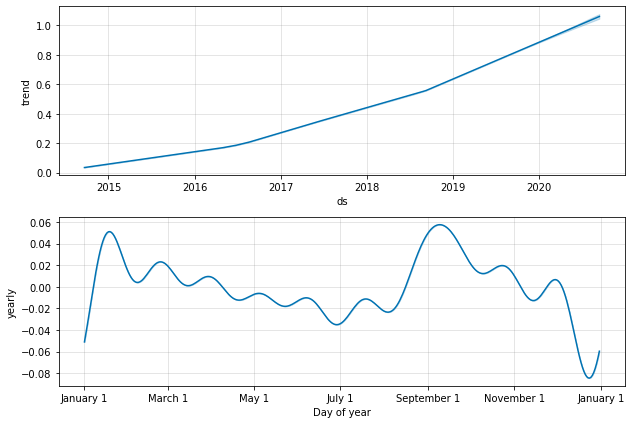

In [27]:
fig2 = prophet.plot_components(forecast)

In [31]:
values = forecast['yhat'].values
values = values.reshape((len(values), 1))

prediction = scaler.inverse_transform(values)

data_frame_pred = pandas.DataFrame()
data_frame_pred['Date'] = forecast['ds']
data_frame_pred['Value'] = prediction
data_frame_pred.set_index('Date', inplace=True)

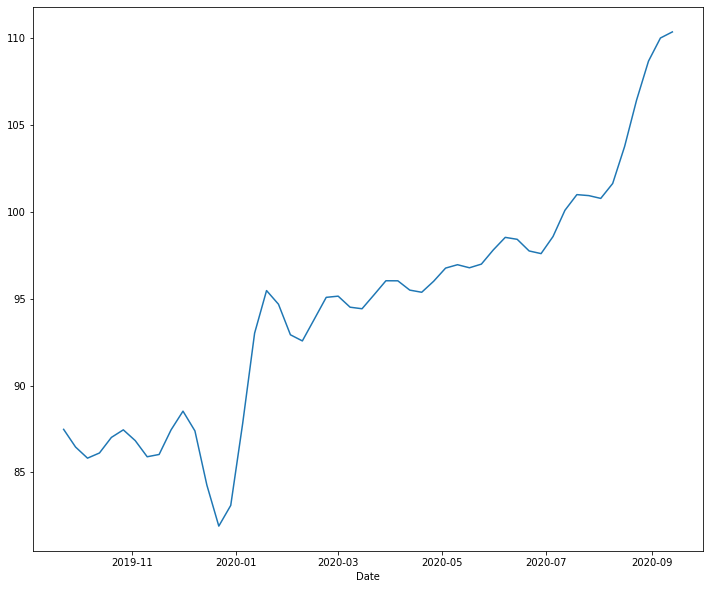

In [32]:
prediction = data_frame_pred['Value']
prediction = prediction[-time_span:]

plt.figure(figsize=(12, 10))
sns.lineplot(x=prediction.index, y=prediction.values)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


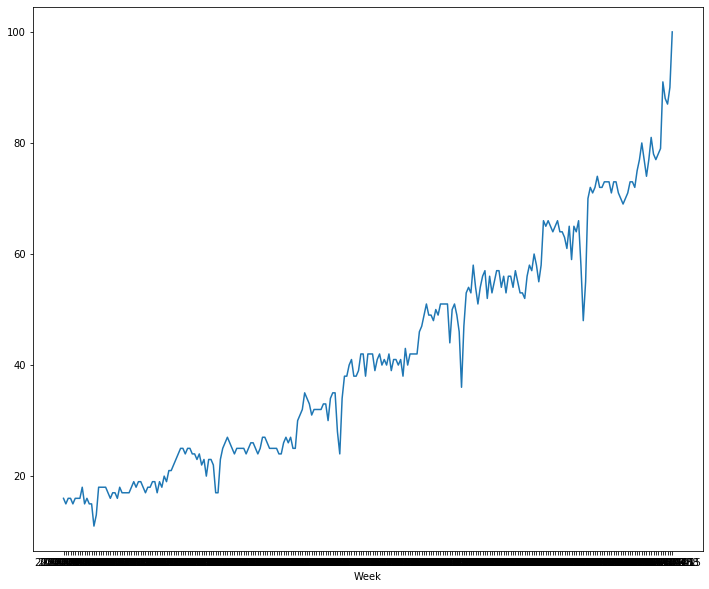

In [35]:
plt.figure(figsize=(12, 10))

sns.lineplot(x=series_full.index, y=series_full.values)
sns.lineplot(x=prediction.index, y=prediction.values)


In [ ]:
out = pandas.DataFrame()

out['Date'] = prediction.index
out['Actual'] = series_full[-time_span:].values
out['Predicted'] = prediction.values

out.to_excel('prediction.xlsx')

In [ ]:
out.head()

In [ ]:
out['Actual'].std()